In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.rc('font', family='Malgun Gothic')
sns.set(font="Malgun Gothic",#"NanumGothicCoding", 
        rc={"axes.unicode_minus":False}, # 마이너스 부호 깨짐 현상 해결
        style='darkgrid')

In [3]:
#자전거 이용률
data1 = pd.read_csv("C:/Users/user/Desktop/데분/bigcam/자전거+이용률_20231029112659.csv")

#자전거 이용환경 만족도
data2 = pd.read_csv("C:/Users/user/Desktop/데분/bigcam/자전거+이용환경+만족도_20231029112736.csv")

#자전거 주차시설 현황
data3 = pd.read_csv("C:/Users/user/Desktop/데분/bigcam/자전거+주차시설+현황_20231029113119.csv")

#자전거 편의시설
data4 = pd.read_csv("C:/Users/user/Desktop/데분/bigcam/서울시 자전거 편의시설.csv", encoding = 'cp949')

#대여소별 이용정보(22.7~22.12)
data5 = pd.read_csv("C:/Users/user/Desktop/데분/bigcam/서울특별시 공공자전거 대여소별 이용정보(월별)_22.7-22.12.csv", encoding = 'cp949')

#대여소별 이용정보(23.1~23.6)
data6 = pd.read_csv("C:/Users/user/Desktop/데분/bigcam/서울특별시 공공자전거 대여소별 이용정보(월별)_23.1-6.csv", encoding = 'cp949')

#이용정보(22.7~22.12)
data7 = pd.read_csv("C:/Users/user/Desktop/데분/bigcam/서울특별시 공공자전거 이용정보(월별)_22.07_22.12.csv", encoding = 'cp949')

#이용정보(23.1~23.6)
data8 = pd.read_csv("C:/Users/user/Desktop/데분/bigcam/서울특별시 공공자전거 이용정보(월별)_23.1-6.csv", encoding = 'cp949')

#자전거 교통사고
data9 = pd.read_csv("C:/Users/user/Desktop/데분/bigcam/자전거+교통사고_20231029112523.csv")

#자전거 도로현황
data10 = pd.read_csv("C:/Users/user/Desktop/데분/bigcam/자전거도로+현황(2013년+이후)_20231029115857.csv", encoding = 'cp949')





# 이용정보

In [97]:
data7.rename(columns={'이동거리(M)': '이용거리(M)',
                      '대여일자':'대여년월'}, inplace=True)

In [98]:
use_df = pd.concat([data7, data8], axis = 0)

In [105]:
# IQR 계산
Q1 = use_df['이용거리(M)'].quantile(0.25)
Q3 = use_df['이용거리(M)'].quantile(0.75)
IQR = Q3 - Q1

# 이상치 경계 설정
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [107]:
# 이상치 식별
outliers = (use_df['이용거리(M)'] < lower_bound) | (use_df['이용거리(M)'] > upper_bound)

# 이상치를 제외한 데이터 추출
use_df_no_outliers = use_df[~outliers]

use_df_no_outliers.drop(use_df_no_outliers[use_df_no_outliers['이용거리(M)'] <= 500].index, inplace=True)

use_df_no_outliers

c:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,대여년월,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이용거리(M),이용시간(분)
0,202207,102,102. 망원역 1번출구 앞,단체권,NaN,20대,4,246.31,2.39,10324.36,113
1,202207,102,102. 망원역 1번출구 앞,단체권,NaN,30대,5,611.4,6.07,26174.29,196
2,202207,102,102. 망원역 1번출구 앞,단체권,NaN,40대,2,163.26,1.48,6342.60,67
3,202207,102,102. 망원역 1번출구 앞,단체권,NaN,~10대,2,494.32,5.17,22290.86,121
4,202207,102,102. 망원역 1번출구 앞,단체권,F,20대,4,265.62,3.21,13837.61,169
...,...,...,...,...,...,...,...,...,...,...,...
622060,202306,6054,6054.청구e편한세상아파트 113동 앞,정기권,M,40대,99,4103.84,31.6,136127.81,1642
622062,202306,6054,6054.청구e편한세상아파트 113동 앞,정기권,M,60대,38,2495.04,20.9,90122.88,1129
622063,202306,6054,6054.청구e편한세상아파트 113동 앞,정기권,M,70대이상,1,27.52,0.32,1390.00,10
622064,202306,6054,6054.청구e편한세상아파트 113동 앞,정기권,M,~10대,21,890.06,5.8,24986.29,276


In [102]:
use_df_no_outliers.isna().sum()

대여년월            0
대여소번호           0
대여소명            0
대여구분코드          0
성별         378996
연령대코드           0
이용건수            0
운동량             0
탄소량             0
이용거리(M)         0
이용시간(분)         0
dtype: int64

In [108]:
print(IQR)
print(Q1)
print(Q3)

83152.3325
8416.042500000001
91568.375


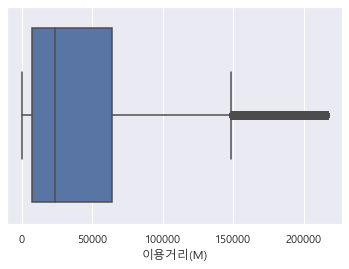

In [109]:
sns.boxplot(use_df_no_outliers['이용거리(M)'])

# 대여소별 이용정보

In [5]:
ro_df = pd.concat([data5, data6], axis = 0)

In [6]:
ro_df[ro_df['반납건수'].str.startswith('-')]

,자치구,대여소명,기준년월,대여건수,반납건수
1640,성동구,9980. 에이텍,202207,3,-
6955,성동구,9980. 에이텍,202209,5,-
11797,동작구,2016. 신대방삼거리역 3번출구쪽,202211,1,-


In [7]:
ro_df['대여건수'] = ro_df['대여건수'].str.replace('-', '0')
ro_df['반납건수'] = ro_df['반납건수'].str.replace('-', '0')


In [8]:
ro_df['대여건수'] = ro_df['대여건수'].apply(lambda x: int(str(x).replace(',', '')))
ro_df['반납건수'] = ro_df['반납건수'].apply(lambda x: int(str(x).replace(',', '')))

In [9]:
def get_season(month):
    if 3 <= month <= 5:
        return '봄'
    elif 6 <= month <= 8:
        return '여름'
    elif 9 <= month <= 11:
        return '가을'
    else:
        return '겨울'

ro_df['계절'] = ro_df['기준년월'].apply(lambda x: get_season(int(str(x)[-2:])))

ro_df

,자치구,대여소명,기준년월,대여건수,반납건수,계절
0,강남구,2301. 현대고등학교 건너편,202207,2170,2183,여름
1,강남구,2302. 교보타워 버스정류장(신논현역 3번출구 후면),202207,1140,1143,여름
2,강남구,2303. 논현역 10번출구,202207,1329,1196,여름
3,강남구,2304. 대현그린타워,202207,288,104,여름
4,강남구,2305. MCM 본사 직영점 앞,202207,334,342,여름
...,...,...,...,...,...,...
16301,중랑구,4837. 양원지구 힐데스하임 앞,202306,853,827,여름
16302,중랑구,4838.동원사거리 행복오피스텔 앞,202306,900,669,여름
16303,중랑구,4840. 서울시 북부병원 앞,202306,875,897,여름
16304,중랑구,4841. 중화수경공원,202306,1886,2147,여름


In [45]:
season_order = {'봄': 1, '여름': 2, '가을': 3, '겨울': 4}
ro_df['계절'] = pd.Categorical(ro_df['계절'], categories=season_order.keys(), ordered=True)

ro_df_season = ro_df.sort_values('계절')

In [47]:
ro_df_season.groupby('계절')['대여건수'].mean()

계절
봄     1582.040529
여름    1570.579177
가을    1628.928064
겨울     684.940988
Name: 대여건수, dtype: float64

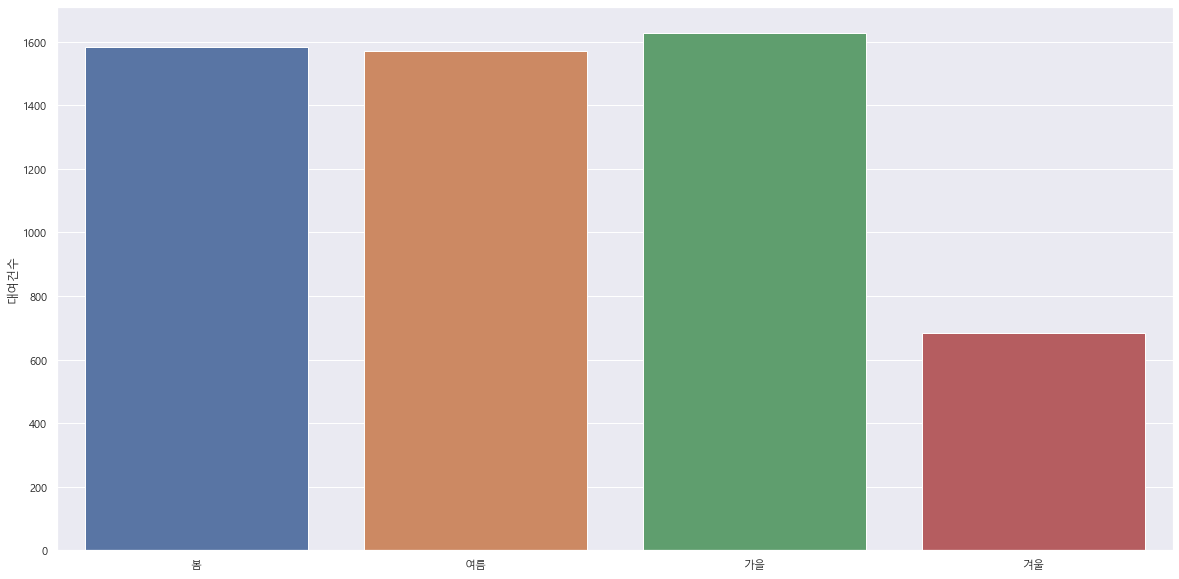

In [48]:
plt.figure(figsize = (20,10))
x = ro_df_season['계절'].unique()
y = ro_df_season.groupby('계절')['대여건수'].mean()
sns.barplot(x,y)
plt.show()

In [17]:
ro_df.groupby('자치구')['반납건수'].sum()

자치구
강남구     1256887
강동구     1956617
강북구      639723
강서구     5040623
관악구     1110797
광진구     2083185
구로구     1717878
금천구      759408
노원구     2602154
도봉구      915792
동대문구    1579643
동작구      938827
마포구     2252526
서대문구     850567
서초구     1319827
성동구     1710922
성북구     1083023
송파구     4081299
양천구     2570741
영등포구    3540843
용산구      899079
은평구     1151908
종로구     1456454
중구       986314
중랑구     1283277
Name: 반납건수, dtype: int64

In [19]:
ro_df['자치구'].unique()

array(['강남구', '강동구', '강북구', '강서구', '관악구', '광진구', '구로구', '금천구', '노원구',
       '도봉구', '동대문구', '동작구', '마포구', '서대문구', '서초구', '성동구', '성북구', '송파구',
       '양천구', '영등포구', '용산구', '은평구', '종로구', '중구', '중랑구'], dtype=object)

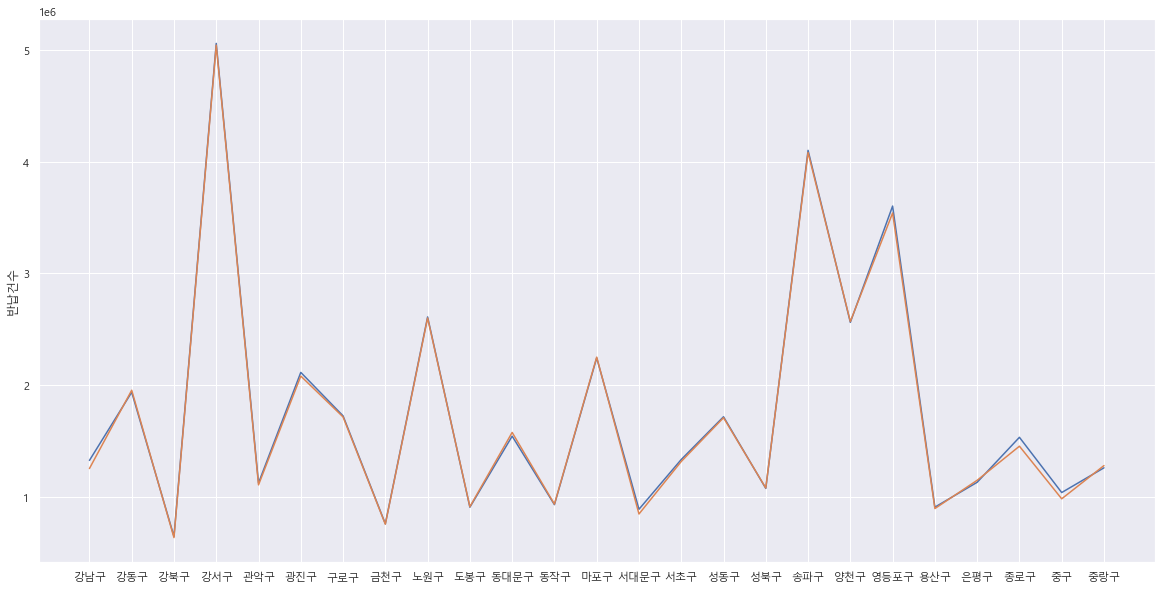

In [27]:
plt.figure(figsize = (20,10))
x = ro_df['자치구'].unique()
y1 = ro_df.groupby('자치구')['대여건수'].sum()
y2 = ro_df.groupby('자치구')['반납건수'].sum()
sns.lineplot(x,y1)
sns.lineplot(x,y2)
plt.show()

# 이용 만족도

In [50]:
data2.rename(columns = {'구분별(2)' : '대구분',
                        '구분별(3)' : '소구분',
                        '2019' : '매우불만족(%)',
                        '2019.1' : '약간불만족(%)',
                        '2019.2' : '보통(%)',
                        '2019.3' : '약간만족(%)',
                        '2019.4' : '매우만족(%)',
                        '2019.5' : '10점평균'}, inplace = True)

In [53]:
us_df = data2.iloc[1:,1:]

In [58]:
us_df

,대구분,소구분,매우불만족(%),약간불만족(%),보통(%),약간만족(%),매우만족(%),10점평균
1,소계,소계,1.2,12.4,37.3,42.5,6.6,6.02
2,성별,남자,1.2,12.0,37.4,42.7,6.7,6.04
3,성별,여자,1.1,13.1,37.1,42.1,6.5,5.99
4,연령별,10대,0.8,12.5,38.7,39.0,8.9,6.07
5,연령별,20대,1.2,8.8,43.0,40.6,6.5,6.06
6,연령별,30대,0.8,12.9,37.8,42.1,6.4,6.01
7,연령별,40대,1.0,14.5,34.7,44.1,5.7,5.98
8,연령별,50대,1.8,15.2,36.0,41.2,5.8,5.85
9,연령별,60대 이상,1.5,12.2,31.0,47.8,7.5,6.19
10,학력별,중졸 이하,0.4,10.9,30.2,51.3,7.2,6.35


In [68]:
us_df_gender = us_df.loc[2:3]
us_df_age = us_df.loc[4:9]
us_df_edu = us_df.loc[10:13]
us_df_income = us_df.loc[14:19]
us_df_married = us_df.loc[20:22]
us_df_place = us_df.loc[28:]

In [70]:
us_df_place.sort_values(by = '10점평균')

,대구분,소구분,매우불만족(%),약간불만족(%),보통(%),약간만족(%),매우만족(%),10점평균
31,지역소분류,성동구,6.2,18.5,33.1,38.6,3.6,5.37
46,지역소분류,영등포구,1.6,21.6,44.4,23.6,8.9,5.41
36,지역소분류,강북구,-,4.2,78.5,12.4,5.0,5.45
44,지역소분류,구로구,4.1,22.7,33.3,29.9,10.0,5.47
37,지역소분류,도봉구,0.7,21.9,41.6,27.8,7.9,5.50
35,지역소분류,성북구,2.1,11.0,51.5,33.8,1.6,5.54
47,지역소분류,동작구,1.5,22.8,32.0,35.6,8.1,5.64
33,지역소분류,동대문구,0.4,19.7,30.7,48.0,1.1,5.74
39,지역소분류,은평구,1.6,14.8,35.5,43.9,4.3,5.86
41,지역소분류,마포구,0.8,16.4,37.3,35.9,9.6,5.93


# 교통사고

In [49]:
data9

,자치구별(1),자치구별(2),유형별(1),2005,2005.1,2005.2,2006,2006.1,2006.2,2007,...,2019.2,2020,2020.1,2020.2,2021,2021.1,2021.2,2022,2022.1,2022.2
0,자치구별(1),자치구별(2),유형별(1),발생건수 (건),사망자수 (명),부상자수 (명),발생건수 (건),사망자수 (명),부상자수 (명),발생건수 (건),...,부상자수 (명),발생건수 (건),사망자수 (명),부상자수 (명),발생건수 (건),사망자수 (명),부상자수 (명),발생건수 (건),사망자수 (명),부상자수 (명)
1,합계,소계,자전거 가해자사고,210,8,224,268,11,266,356,...,1950,1802,14,2018,1779,13,1969,1674,8,1861
2,합계,소계,자전거 피해자사고,1343,22,1387,1419,14,1451,1553,...,1714,1641,9,1790,1554,14,1684,1454,6,1550
3,합계,종로구,자전거 가해자사고,4,-,4,2,-,2,9,...,18,20,1,23,19,-,20,30,-,35
4,합계,종로구,자전거 피해자사고,24,-,25,18,-,18,27,...,23,23,-,23,27,-,27,16,1,15
5,합계,중구,자전거 가해자사고,3,-,3,-,-,-,1,...,25,20,-,21,17,-,19,24,-,25
6,합계,중구,자전거 피해자사고,16,-,16,12,-,12,17,...,17,17,-,17,19,-,19,20,-,23
7,합계,용산구,자전거 가해자사고,3,-,3,9,-,9,4,...,23,18,-,22,48,-,57,30,-,33
8,합계,용산구,자전거 피해자사고,19,-,19,22,-,23,14,...,33,25,-,27,51,1,57,37,-,39
9,합계,성동구,자전거 가해자사고,8,-,11,6,-,6,14,...,68,93,1,102,87,-,98,85,1,91


# 자전거 도로현황

In [87]:
data10.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   지역별(2)            31 non-null     object 
 1   지역별(3)            31 non-null     object 
 2   노선수 합(개)          31 non-null     int64  
 3   길이 합(km)          31 non-null     float64
 4   자전거 전용도로 노선수      31 non-null     object 
 5   자전거 전용도로 길이       31 non-null     object 
 6   자전거보행자 겸용도로 노선수   31 non-null     int64  
 7   자전거보행자 겸용도로 길이    31 non-null     float64
 8   자전거 전용차로 노선수      31 non-null     object 
 9   자전거 전용차로 길이       31 non-null     object 
 10  자전거우선도로 노선수       31 non-null     object 
 11  자전거우선도로 길이        31 non-null     object 
dtypes: float64(2), int64(2), object(8)
memory usage: 3.0+ KB


In [100]:
# 숫자열에 대해 콤마 제거 및 정수로 변환
x = [4, 5, 8, 9, 10, 11]
columns_to_process = data10.columns[x]

for column in columns_to_process:
    data10[column] = data10[column].apply(lambda x: int(float(str(x).replace('-', '0'))))

In [104]:
data10.sort_values(by = '길이 합(km)')

,지역별(2),지역별(3),노선수 합(개),길이 합(km),자전거 전용도로 노선수,자전거 전용도로 길이,자전거보행자 겸용도로 노선수,자전거보행자 겸용도로 길이,자전거 전용차로 노선수,자전거 전용차로 길이,자전거우선도로 노선수,자전거우선도로 길이
30,기타,공원,3,4.6,1,1,2,3.6,0,0,0,0
10,도로변,강북구,8,8.7,0,0,3,3.2,5,5,0,0
28,기타,교량,10,8.9,1,1,9,7.8,0,0,0,0
19,도로변,금천구,20,9.2,3,2,17,6.6,0,0,0,0
8,도로변,중랑구,22,9.8,10,3,12,6.0,0,0,0,0
11,도로변,도봉구,8,12.9,2,1,6,11.5,0,0,0,0
21,도로변,동작구,17,14.3,0,0,15,13.6,0,0,2,0
9,도로변,성북구,30,16.8,15,6,9,7.0,5,2,1,0
3,도로변,중구,21,22.4,1,4,6,7.5,0,0,14,10
18,도로변,구로구,44,27.5,4,1,38,24.7,0,0,2,1
